In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
import os

In [3]:
CaMcases= ['linkerCoil','linkerHelix'] #'linkerCoilimpairedDomain',
CaMBRcases = ['CaMBRhelix','CaMBRcoil']
ionics = ["0M","0.15M","0.5M"]



def readContacts(cam,cambr,ion,N=201):
    alldata = []
    for z in np.arange(1,N):
        temp = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"contacts"),\
                   comments="#")
        alldata.append(temp)
    return alldata

In [4]:
def readRMSD(cam,cambr,ion,N=201):
    rmsddata = []
    for z in np.arange(1,N):
        temp = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"rmsd.dat"),\
                   comments="#")
        rmsddata.append(temp)
        
    return rmsddata



def readDis(cam,cambr,ion,N=201):
    disdata = []
    for z in np.arange(1,N):
        temp2 = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"dis.dat"),\
                   comments="#")
        disdata.append(temp2)
        
    return disdata

In [11]:
contact = {i:{} for i in CaMcases }


In [12]:
for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #contact[i]['CaMBRcoil'] = {j:readContacts(i,'CaMBRcoil',j) for j in ionics}
    contact[i]['CaMBRhelix'] = {j:readContacts(i,'CaMBRhelix',j) for j in ionics}

In [13]:
contact['linkerHelix']['CaMBRcoil'] = {}

In [14]:
contact['linkerHelix']['CaMBRcoil']['0M'] = readContacts('linkerHelix','CaMBRcoil','0M',N=101)
contact['linkerHelix']['CaMBRcoil']['0.15M'] = readContacts('linkerHelix','CaMBRcoil','0.15M',N=101)

In [15]:
contact['linkerCoil']['CaMBRcoil'] = {}
contact['linkerCoil']['CaMBRcoil']['0M'] = readContacts('linkerCoil','CaMBRcoil','0M',N=101)
contact['linkerCoil']['CaMBRcoil']['0.15M'] = readContacts('linkerCoil','CaMBRcoil','0.15M',N=101)

In [16]:
rmsd = {i:{} for i in CaMcases }
for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #rmsd[i]['CaMBRcoil'] = {j:readRMSD(i,'CaMBRcoil',j) for j in ionics}
    rmsd[i]['CaMBRhelix'] = {j:readRMSD(i,'CaMBRhelix',j) for j in ionics}


In [18]:
rmsd['linkerHelix']['CaMBRcoil'] = {}
rmsd['linkerHelix']['CaMBRcoil']['0M'] = readRMSD('linkerHelix','CaMBRcoil','0M',N=101)
rmsd['linkerHelix']['CaMBRcoil']['0.15M'] = readRMSD('linkerHelix','CaMBRcoil','0.15M',N=101)

In [19]:
rmsd['linkerCoil']['CaMBRcoil'] = {}
rmsd['linkerCoil']['CaMBRcoil']['0M'] = readRMSD('linkerCoil','CaMBRcoil','0M',N=101)
rmsd['linkerCoil']['CaMBRcoil']['0.15M'] = readRMSD('linkerCoil','CaMBRcoil','0.15M',N=101)

In [20]:
dis = {i:{} for i in CaMcases }

for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #rmsd[i]['CaMBRcoil'] = {j:readRMSD(i,'CaMBRcoil',j) for j in ionics}
    dis[i]['CaMBRhelix'] = {j:readDis(i,'CaMBRhelix',j) for j in ionics}



In [21]:
dis['linkerHelix']['CaMBRcoil'] = {}
dis['linkerHelix']['CaMBRcoil']['0M'] = readDis('linkerHelix','CaMBRcoil','0M',N=101)
dis['linkerHelix']['CaMBRcoil']['0.15M'] = readDis('linkerHelix','CaMBRcoil','0.15M',N=101)

In [22]:
dis['linkerCoil']['CaMBRcoil'] = {}
dis['linkerCoil']['CaMBRcoil']['0M'] = readDis('linkerCoil','CaMBRcoil','0M',N=101)
dis['linkerCoil']['CaMBRcoil']['0.15M'] = readDis('linkerCoil','CaMBRcoil','0.15M',N=101)

In [23]:
def drawAlltraces(contacts,rmsd=False):
    plt.style.use("seaborn")
    plt.figure(figsize=(10,5))
    n=0
    for i in range(100):
        n += 1
        plt.subplot(10,10,n)
        if not rmsd:
            plt.plot(contacts[i][:,0],contacts[i][:,1],color='blue',lw=0.5)
            plt.plot(contacts[i][:,0],contacts[i][:,2],color='orange',lw=0.5)
            plt.ylim([0,150])
        else:
            plt.plot(contacts[i][:,0]*1.5,contacts[i][:,1],color='black',lw=0.5)
            plt.ylim([0,50])
            
        plt.xticks([])
        plt.yticks([])
    plt.subplots_adjust(hspace=0,wspace=0)
    
    

In [27]:
def contactTime(contact,Tm=10,N=200):
    """
    Time needed to achieve Tm contacts
    """
    Alltime = []
    Allindex = []
    for i in range(N):
        if len(contact[i].shape) > 1: 
            indx = np.argmax(np.sum(contact[i][:,1:3],axis=1)>Tm)
            Allindex.append(indx)
        #print (i)
            Time = contact[i][:,0][indx]
            Alltime.append(Time) 
    return Alltime,Allindex
        
        

In [28]:
TmTime = {i:{} for i in CaMcases}

In [29]:
for i in ['linkerCoil','linkerHelix']: #,'linkerCoilimpairedDomain']:
    TmTime[i]['CaMBRhelix'] = {j:contactTime(contact[i]['CaMBRhelix'][j],Tm=50) for j in ionics}


In [30]:
TmTime['linkerHelix']['CaMBRcoil'] = {}
TmTime['linkerHelix']['CaMBRcoil']['0M'] = contactTime(contact['linkerHelix']['CaMBRcoil']['0M'],N=100)
TmTime['linkerHelix']['CaMBRcoil']['0.15M'] = contactTime(contact['linkerHelix']['CaMBRcoil']['0.15M'],N=100)

In [31]:
TmTime['linkerCoil']['CaMBRcoil'] = {}
TmTime['linkerCoil']['CaMBRcoil']['0M'] = contactTime(contact['linkerCoil']['CaMBRcoil']['0M'],N=100)
TmTime['linkerCoil']['CaMBRcoil']['0.15M'] = contactTime(contact['linkerCoil']['CaMBRcoil']['0.15M'],N=100)

In [96]:
from scipy.optimize import curve_fit

In [76]:
def expfunc(x,A,tao):
    """
    The encounter times of all trials will be fitted to an exponentail distribution
    and 1/tao is the average encounter time
    """
    return A*np.exp(-tao*x)

In [82]:
# since we have total 200 trials, we will apply bootstraping, i.e., to resample 1000 times
# each time has 200 data points, and for each sample, do exponetial fitting and get the 
# encounter time as 1/t

def bootStraping(data,N=1000):
    """
    Bootstrapping, resample 500 times
    """
    
    nd = len(data) # number of data points in the original sample
    x = np.arange(nd)
    num_samples = N
    idx = np.random.randint(0,len(x),size=(num_samples,len(x)))
    allpots = []
    #resamples_arr = x[idx]
    for i in range(N):
        nidx = np.asarray(idx[i,:])
        hists = np.histogram(np.asarray(data)[nidx],density=True)
        popt1, _ = curve_fit(expfunc, hists[1][:-1]*1e-9, hists[0])
        allpots.append(4*1e9/popt1[1]) # average encounter time, 1/tao, in unit of ns, since matric CG time 
                                       # scale is 4 times faster than all-atom, we multiply 4
    return allpots
    
        
    


In [83]:
lhch0M = bootStraping(TmTime['linkerHelix']['CaMBRhelix']['0M'][0])
lhch15M = bootStraping(TmTime['linkerHelix']['CaMBRhelix']['0.15M'][0])
lhch5M = bootStraping(TmTime['linkerHelix']['CaMBRhelix']['0.5M'][0])
lcch0M = bootStraping(TmTime['linkerCoil']['CaMBRhelix']['0M'][0])
lcch15M = bootStraping(TmTime['linkerCoil']['CaMBRhelix']['0.15M'][0])
lcch5M = bootStraping(TmTime['linkerCoil']['CaMBRhelix']['0.5M'][0])

In [84]:
LHCH = [np.mean(lhch0M),np.mean(lhch15M),np.mean(lhch5M)]
LHCHstd = [np.std(lhch0M),np.std(lhch15M),np.std(lhch5M)]

LCCH =  [np.mean(lcch0M),np.mean(lcch15M),np.mean(lcch5M)]
LCCHstd = [np.std(lcch0M),np.std(lcch15M),np.std(lcch5M)]


([<matplotlib.axis.XTick at 0x7fe7a08bd668>,
 <a list of 2 Text xticklabel objects>)

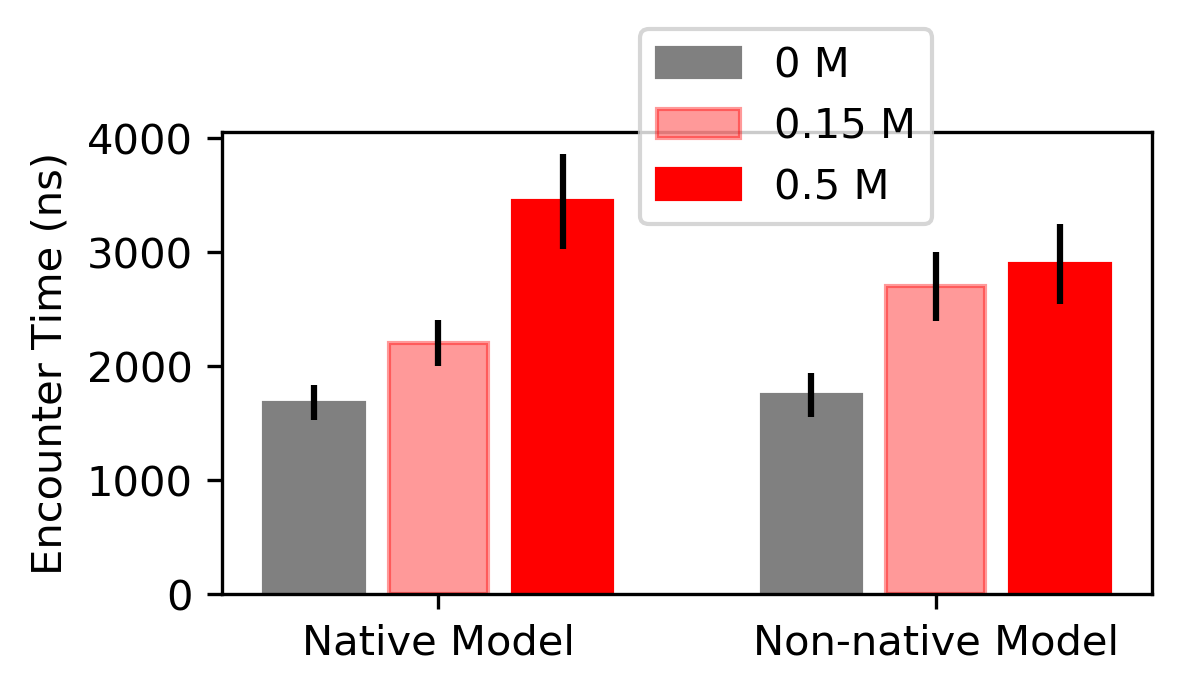

In [92]:
colors = ['grey','red','red']
Label1 = ['0 M','0.15 M', '0.5 M']

plt.figure(figsize=(4,2),dpi=300)

barlist1 = plt.bar(np.arange(3),LHCH,yerr=LHCHstd)
for i,j in enumerate(barlist1):
    j.set_color(colors[i])
    j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)
barlist2 = plt.bar(np.arange(4,7),LCCH,yerr=LCCHstd)

for i,j in enumerate(barlist2):
    j.set_color(colors[i])
    #j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)

plt.ylabel('Encounter Time (ns)')
plt.legend(fontsize=10,loc=(0.45,0.8))
#plt.xticks([1,5],['$L_{helix}C_{helix}$','$L_{coil}C_{helix}$'])
plt.xticks([1,5],['Native Model','Non-native Model'])

[3.32500090e-03 3.77956242e+06]
[3.27914391e-03 4.92683360e+06]
[2.53017450e-03 2.73892892e+06]
[2.24416219e-03 2.76359492e+06]


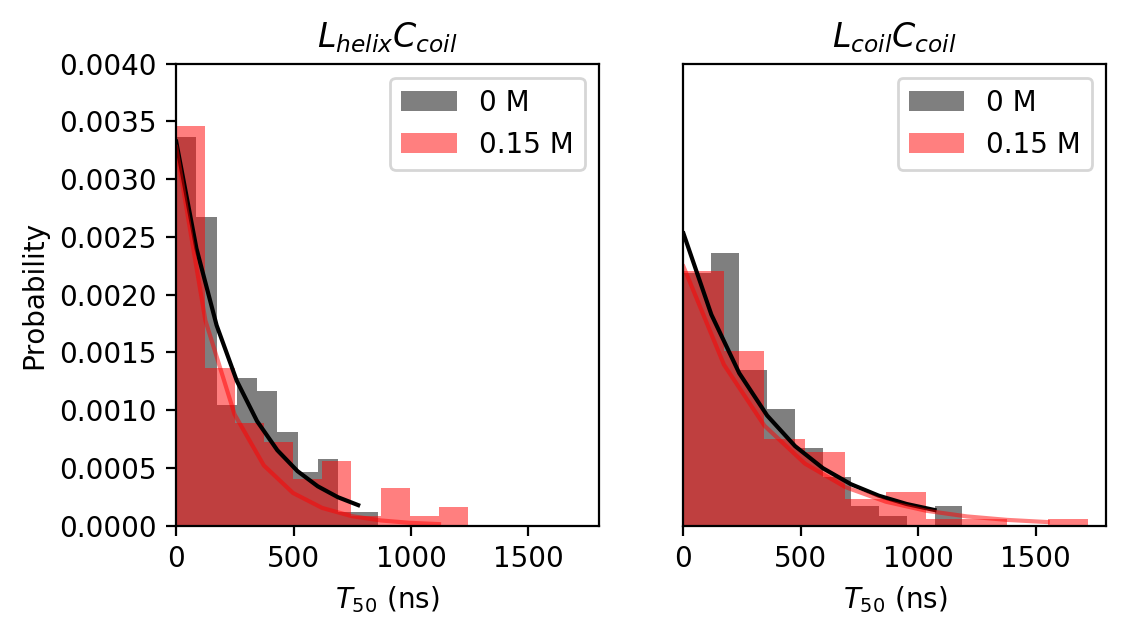

In [46]:




plt.style.use('default')
plt.figure(dpi=200,figsize=(6,3))
plt.subplot(1,2,1)
value5 = plt.hist(TmTime['linkerHelix']['CaMBRcoil']['0M'][0],density=True,color='black',alpha=0.5,label="0 M")
plt.plot(value5[1][:-1],expfunc(value5[1][:-1]*1e-9,*popt5),"k-")
value6 = plt.hist(TmTime['linkerHelix']['CaMBRcoil']['0.15M'][0],density=True,alpha=0.5,color='red',label="0.15 M")
plt.plot(value6[1][:-1],expfunc(value6[1][:-1]*1e-9,*popt6),'r-',alpha=0.5)
plt.xlabel('$T_{50}$ (ns)')
plt.xlim([0,1800])
plt.ylim([0,0.004])
plt.legend()

plt.ylabel("Probability")

plt.title("$L_{helix}C_{coil}$")

print (popt5)
print (popt6)


plt.subplot(1,2,2)
value1 = plt.hist(TmTime['linkerCoil']['CaMBRcoil']['0M'][0],density=True,color='black',alpha=0.5,label="0 M")
plt.plot(value1[1][:-1],expfunc(value1[1][:-1]*1e-9,*popt1),"k-")
value2 = plt.hist(TmTime['linkerCoil']['CaMBRcoil']['0.15M'][0],density=True,alpha=0.5,color='red',label="0.15 M")
plt.plot(value2[1][:-1],expfunc(value2[1][:-1]*1e-9,*popt2),'r-',alpha=0.5)
plt.xlabel('$T_{50}$ (ns)')
plt.xlim([0,1800])
plt.ylim([0,0.004])
plt.legend()

plt.yticks([])
plt.title("$L_{coil}C_{coil}$")

print (popt1)
print (popt2)





[2.24913039e-03 2.41028969e+06]
[1.69877022e-03 1.83832061e+06]
[1.21109695e-03 1.18091336e+06]
[2.00594819e-03 2.30653987e+06]
[1.45747250e-03 1.50483176e+06]
[1.33577842e-03 1.40015207e+06]


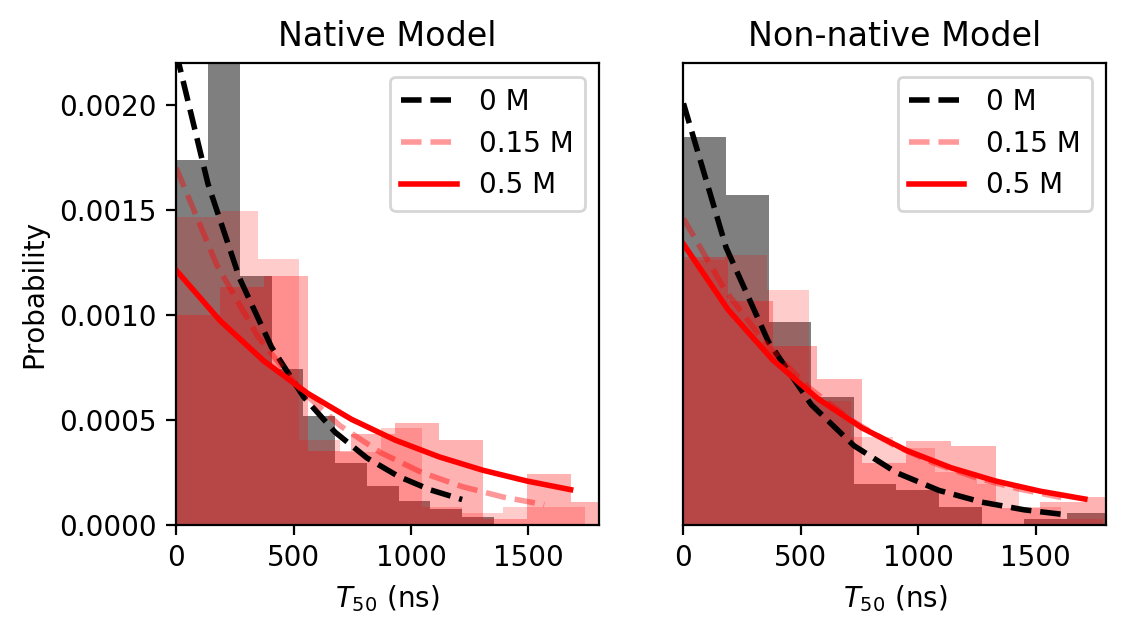

In [108]:
plt.style.use('default')
plt.figure(dpi=200,figsize=(6,3))

plt.subplot(1,2,1)
value7 = plt.hist(TmTime['linkerHelix']['CaMBRhelix']['0M'][0],density=True,color='black',alpha=0.5)
plt.plot(value7[1][:-1],expfunc(value7[1][:-1]*1e-9,*popt7),"k--",lw=2,label="0 M")
value8 = plt.hist(TmTime['linkerHelix']['CaMBRhelix']['0.15M'][0],density=True,alpha=0.2,color='red')
plt.plot(value8[1][:-1],expfunc(value8[1][:-1]*1e-9,*popt8),'r--',alpha=0.4,lw=2,label="0.15 M")

value8a = plt.hist(TmTime['linkerHelix']['CaMBRhelix']['0.5M'][0],density=True,alpha=0.3,color='red')
plt.plot(value8a[1][:-1],expfunc(value8a[1][:-1]*1e-9,*popt8a),'r-',lw=2,label="0.5 M")


plt.xlabel('$T_{50}$ (ns)')
plt.xlim([0,1800])
plt.ylim([0,0.0022])
plt.legend()

plt.ylabel("Probability")
#plt.title("$L_{helix}C_{helix}$")
plt.title("Native Model")
plt.subplots_adjust(hspace=0.5)


print (popt7)
print (popt8)
print (popt8a)


plt.subplot(1,2,2)

value3 = plt.hist(TmTime['linkerCoil']['CaMBRhelix']['0M'][0],density=True,color='black',alpha=0.5)
plt.plot(value3[1][:-1],expfunc(value3[1][:-1]*1e-9,*popt3),"k--",lw=2,label="0 M")
value4 = plt.hist(TmTime['linkerCoil']['CaMBRhelix']['0.15M'][0],density=True,alpha=0.2,color='red')
plt.plot(value4[1][:-1],expfunc(value4[1][:-1]*1e-9,*popt4),'r--',alpha=0.4,lw=2,label="0.15 M")

value5a = plt.hist(TmTime['linkerCoil']['CaMBRhelix']['0.5M'][0],density=True,alpha=0.3,color='red')
plt.plot(value5a[1][:-1],expfunc(value5a[1][:-1]*1e-9,*popt5a),'r-',lw=2,label="0.5 M")


plt.xlabel('$T_{50}$ (ns)')
plt.xlim([0,1800])
plt.ylim([0,0.0022])
plt.legend()
plt.yticks([])
#plt.title("$L_{coil}C_{helix}$")
plt.title("Non-native Model")


print (popt3)
print (popt4)
print (popt5a)



In [107]:
print (LHCH)
print (LHCHstd)

print (LCCH)
print (LCCHstd)

[1675.4986394344264, 2198.8809017042463, 3441.5803828538924]
[154.59246295767792, 202.63824429778452, 417.7444628442062]
[1744.8813691455662, 2695.705474050401, 2893.885467538199]
[189.52064047997865, 301.1930204693532, 351.655594000396]


 The average time can be used to calculate the association rate
$K_a = \frac{1}{T_{50}} \frac{V_{box}}{1/N_A}$

In [99]:
# association rate
def Ka(x):
    Time = x*1e-9 # s
    Vbox = 3.375e-21 # L, is the volume of the box
    Na  = 6.022e23
    return (1/Time)*Vbox*Na

In [100]:
KaLHCH = [Ka(i) for i in LHCH]
KaLCCH = [Ka(i) for i in LCCH]

In [102]:
# percentage error of Ka is the same as that of encounter time
# as Ka = ectime^{-1}*constant
LHCHerror = np.asarray(LHCHstd)/np.asarray(LHCH)
LCCHerror = np.asarray(LCCHstd)/np.asarray(LCCH)

KaLHCHstd = np.asarray(KaLHCH)*LHCHerror
KaLCCHstd = np.asarray(KaLCCH)*LCCHerror


In [106]:
print (np.asarray(KaLHCH)/1e8,KaLHCHstd/1e8)
print (np.asarray(KaLCCH)/1e8,KaLCCHstd/1e8)

[12.13026947  9.24299719  5.90549914] [1.119218   0.85178998 0.71681881]
[11.64792653  7.53949205  7.02317014] [1.26514188 0.84239262 0.8534329 ]


In [101]:
aa = np.asarray([1,2,3])
bb = np.asarray([1,2,3])
print (aa*bb)

[1 4 9]


([<matplotlib.axis.XTick at 0x7fe7a12e0b00>,
 <a list of 2 Text xticklabel objects>)

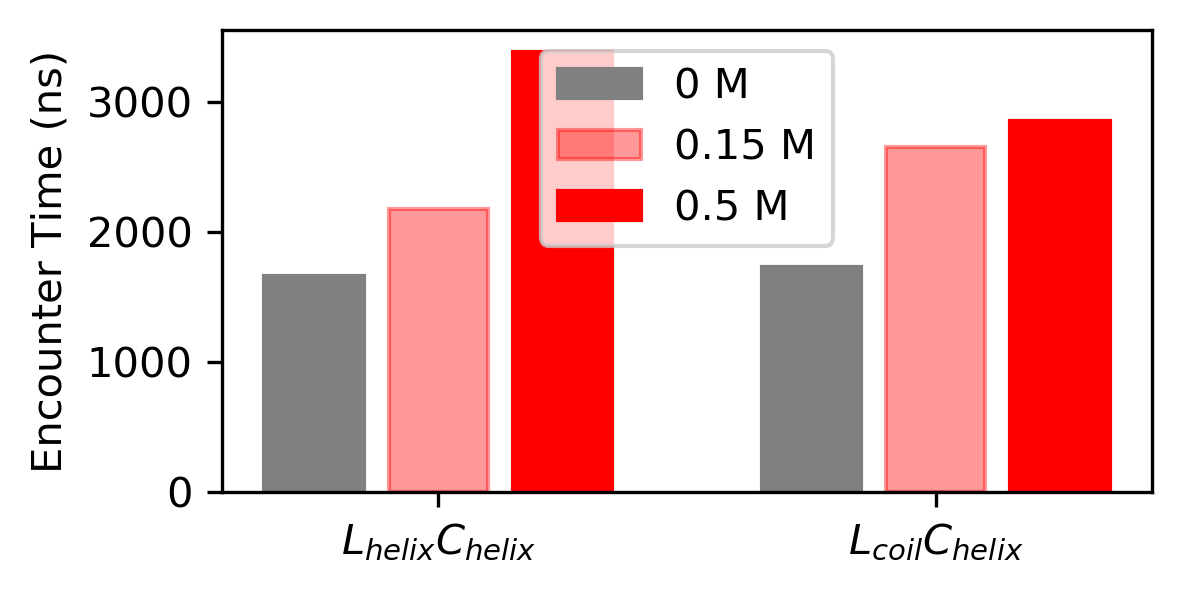

In [52]:
colors = ['grey','red','red']
Label1 = ['0 M','0.15 M', '0.5 M']

plt.figure(figsize=(4,2),dpi=300)

barlist1 = plt.bar(np.arange(3),LHCH)
for i,j in enumerate(barlist1):
    j.set_color(colors[i])
    j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)
barlist2 = plt.bar(np.arange(4,7),np.asarray([1e9/popt3[1],1e9/popt4[1],1e9/popt5a[1]])*4)

for i,j in enumerate(barlist2):
    j.set_color(colors[i])
    #j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)

plt.ylabel('Encounter Time (ns)')
plt.legend()
plt.xticks([1,5],['$L_{helix}C_{helix}$','$L_{coil}C_{helix}$'])

In [111]:
print (np.asarray(KaLHCH)/1e8)
print (np.asarray(KaLCCH)/1e8)

[11.17933719  9.49426703  6.30446471]
[10.56293354  7.45027333  8.8549393 ]


In [119]:
print (popt1)
print (popt2)
print (popt3)
print (popt4)
print (popt5)
print (popt6)
print (popt7)
print (popt8)

[2.91538473e-03 3.36618251e+06]
[2.83206631e-03 3.21187787e+06]
[2.96581528e-03 3.46017178e+06]
[2.08852909e-03 2.17457118e+06]
[4.75110193e-03 4.85720951e+06]
[2.75565484e-03 3.25390004e+06]
[4.44828332e-03 4.61347170e+06]
[1.92026848e-03 1.61255768e+06]


In [138]:
# Now calculate the CaMBR-CaM dis/ RMSD to native complex to loate these encounter complex

def contactDistRMSD(contact,rmsd,dis,Tm=50):
    """
    When form Tm contacts, get the RMSD/Dis values
    """
    locs = []
    for i in range(100):
        if len(contact[i].shape) > 1: 
            indx = np.argmax(np.sum(contact[i][:,1:3],axis=1)>Tm)
            
            RMSDvalue = rmsd[i][:,1][indx]
            DisValue = dis[i][:,1][indx]
            locs.append([DisValue,RMSDvalue])
        
    return np.asarray(locs)

In [139]:
# encounter complex locations
ecLocs = {i:{} for i in CaMcases}
for i in ['linkerCoil','linkerHelix']: #,'linkerCoilimpairedDomain']:
    ecLocs[i]['CaMBRhelix'] = {j:contactDistRMSD(contact[i]['CaMBRhelix'][j],\
                                                 rmsd[i]['CaMBRhelix'][j],\
                                                 dis[i]['CaMBRhelix'][j],Tm=50) for j in ionics}
    
    ecLocs[i]['CaMBRcoil'] = {j:contactDistRMSD(contact[i]['CaMBRcoil'][j],\
                                                rmsd[i]['CaMBRcoil'][j],\
                                                dis[i]['CaMBRcoil'][j],\
                                                Tm=50) for j in ionics}
    
ecLocs['linkerHelix']['CaMBRhelix']['0.5M'] = contactDistRMSD(contact['linkerHelix']['CaMBRhelix']['0.5M'],\
                                                              rmsd['linkerHelix']['CaMBRhelix']['0.5M'],\
                                                              dis['linkerHelix']['CaMBRhelix']['0.5M'],
                                                              Tm=50)

ecLocs['linkerCoil']['CaMBRhelix']['0.5M'] = contactDistRMSD(contact['linkerCoil']['CaMBRhelix']['0.5M'],\
                                                             rmsd['linkerCoil']['CaMBRhelix']['0.5M'],\
                                                             dis['linkerCoil']['CaMBRhelix']['0.5M'],
                                                             Tm=50)

(0, 65)

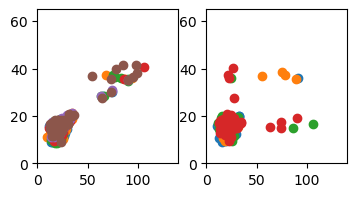

In [145]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1])

plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,1])
plt.xlim([0,140])
plt.ylim([0,65])

plt.subplot(1,2,2)
plt.scatter(ecLocs['linkerHelix']['CaMBRcoil']['0M'][:,0],ecLocs['linkerHelix']['CaMBRcoil']['0M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRcoil']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRcoil']['0.15M'][:,1])
#plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1])

plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,0],ecLocs['linkerCoil']['CaMBRcoil']['0M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerCoil']['CaMBRcoil']['0.15M'][:,1])
#plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,1])
plt.xlim([0,140])
plt.ylim([0,65])

In [147]:
import pickle

In [148]:
f = open('DomainConstraintsmapling','rb')
sampling = pickle.load(f)
f.close()

# 0.5M sampling
f = open('DomainConstraintsmapling5M','rb')
M5sampling = pickle.load(f)
f.close()

In [149]:
for i in sampling.keys():
    energy = -0.593*np.log(sampling[i][2]/np.min(sampling[i][2]))
    sampling[i].append(energy)
    print (np.min(energy),np.max(energy))
for i in M5sampling.keys():
    energy = -0.593*np.log(M5sampling[i][2]/np.min(M5sampling[i][2]))
    M5sampling[i].append(energy)
    print (np.min(energy),np.max(energy))

-5.353701773658445 0.0
-5.496550100415455 0.0
-5.506165680887278 0.0
-5.539862355716352 0.0
-5.526099388189316 0.0
-5.475538089790116 0.0
-5.548603847897024 0.0
-5.676809948843418 0.0
-5.384678712767622 0.0
-5.593087016473104 0.0


Text(0.5, 0, 'CaMBR-CaM \n dist. ($\\AA$)')

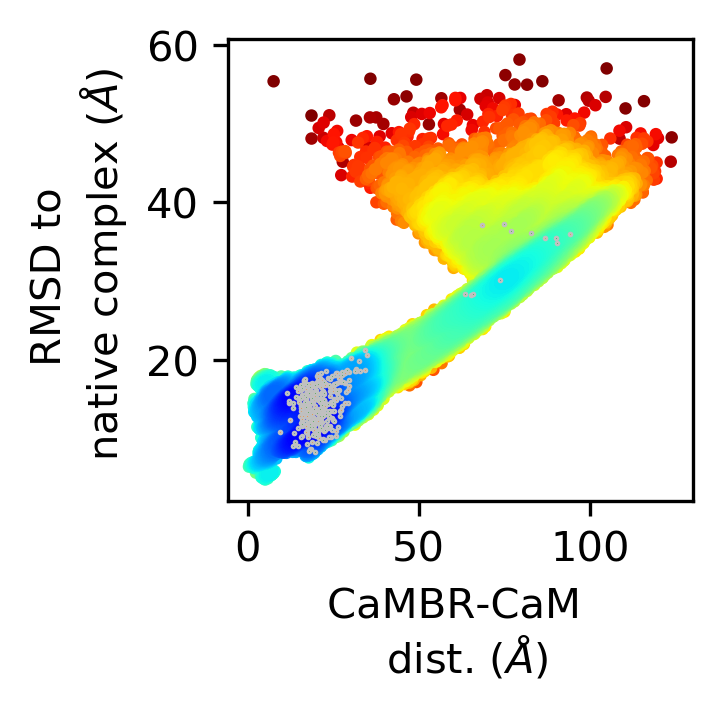

In [165]:
plt.figure(figsize=(2,2),dpi=300)
area=4
plt.scatter(sampling['LHCH0'][0],sampling['LHCH0'][1],c=sampling['LHCH0'][3],s=area,vmin=-6,cmap='jet')


area2=0.3
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,1],s=area2,edgecolor='silver',lw=0.8)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,1],s=area2,edgecolor='silver',lw=0.8)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1],s=area2,edgecolor='silver',lw=0.8)

plt.ylabel('RMSD to \n native complex ($\AA$)')
plt.xlabel('CaMBR-CaM \n dist. ($\AA$)')

(0, 60)

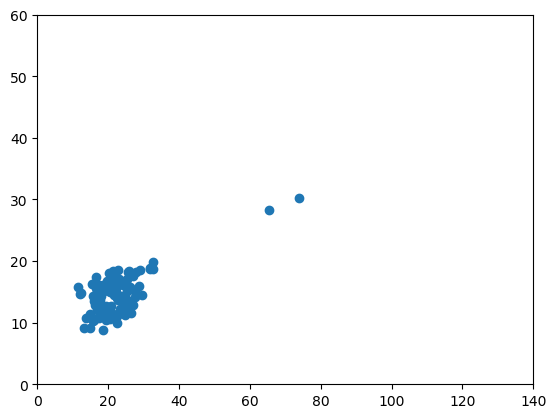

In [135]:
plt.scatter(aa[:,0],aa[:,1])
plt.xlim([0,140])
plt.ylim([0,60])

In [ ]:
def readRMSD(Dir):
    """
    read in the rmsd values of the N/C domains
    """
    idx = 0
    for i in range(1,101):
        Nrmsdfile = path.join(Dir,str(i),'Nrmsd.dat')
        Crmsdfile = path.join(Dir,str(i),'Crmsd.dat')
        Allrmsdfile = path.join(Dir,str(i),'rmsd.dat')
        disfile = path.join(Dir,str(i),'dis.dat')
        if path.exists(Nrmsdfile):
            idx += 1
            #print (i)
            tempN = np.loadtxt(Nrmsdfile,skiprows=2,comments="#",usecols=[1])
            tempC = np.loadtxt(Crmsdfile,skiprows=2,comments="#",usecols=[1])
            allrmsd = np.loadtxt(Allrmsdfile,skiprows=2,comments="#",usecols=[1])
            dis = np.loadtxt(disfile,skiprows=2,comments="#",usecols=[1])
            if idx == 1:
                Ncoord = tempN
                Ccoord = tempC
                Allrmsd = allrmsd
                alldis = dis
            else:
                Ncoord = np.hstack((Ncoord,tempN))
                Ccoord = np.hstack((Ccoord,tempC))
                Allrmsd = np.hstack((Allrmsd,allrmsd))
                alldis = np.hstack((alldis,dis))
    return Ncoord, Ccoord,Allrmsd,alldis
            
    #print (i,status)

In [76]:
# now check the specific residue-residue contact in the encounter complex 
Ncontacts = "/home/binsun/plotfigures/DHkinetics/martinicg/CaMBRcoil/0M/10/Ncontact"
Ccontacts = "/home/binsun/plotfigures/DHkinetics/martinicg/CaMBRcoil/0M/10/Ccontact"

In [55]:
def getTmContact(cam,cambr='CaMBRcoil',ionic='0M'):
    """
    Get the residue-specific contact at the enconter complex
    """
    
    total = [[i,0.0] for i in range(1,144)] # create a list to store the contact for each residue
    
    for i in range(50):
        Nfile = os.path.join(os.getcwd(),"martinicg",cam,cambr,ionic,str(i+1),"Ncontact")
        Cfile = os.path.join(os.getcwd(),"martinicg",cam,cambr,ionic,str(i+1),"Ccontact")
        with open(Nfile,'r') as f:
            Ndata = f.readlines()

        with open(Cfile,'r') as f:
            Cdata = f.readlines()
            
        nlist=Ndata[TmTime[cam][cambr][ionic][1][i]]
        clist=Cdata[TmTime[cam][cambr][ionic][1][i]]
        
        if len(clist.split()) > 2:
            cres = [int(i.split("-")[0]) for i in clist.split()[1:]]
            aa = [[i,cres.count(i)] for i in set(cres)]
            for j in aa:
                total[j[0]-1][1] = total[j[0]-1][1]+j[1] 
            
        if len(nlist.split()) > 2:
            nres = [int(i.split("-")[0]) for i in nlist.split()[1:]]
            aa = [[i,nres.count(i)] for i in set(nres)]
            for j in aa:
                total[j[0]-1][1] = total[j[0]-1][1]+j[1]
                
    tt = list(zip(*total))
    
    tt[0] = np.asarray(tt[0]) + 4 # first residue starts at 5 in pdb 3cln
    tt[1] = np.asarray(tt[1])/50
    plt.figure(dpi=130)
    plt.bar(tt[0]+4,tt[1])
    plt.xlabel('CaM residue')
    plt.ylabel('Contact frequency with CaMBR')
    plt.ylim([0,2.0])
    
                
    return tt


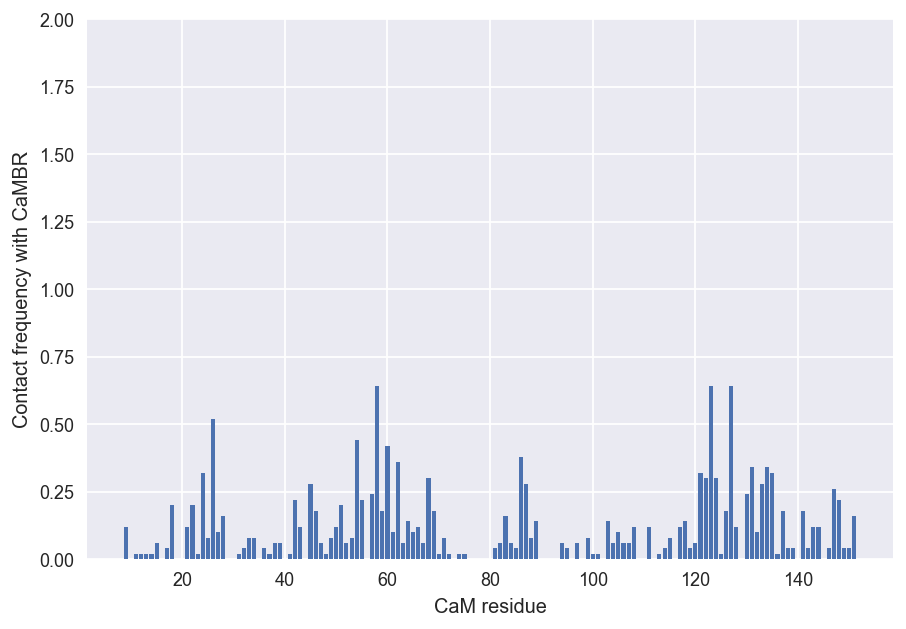

In [74]:
LCCC0M=getTmContact('linkerCoil','CaMBRcoil','0M')

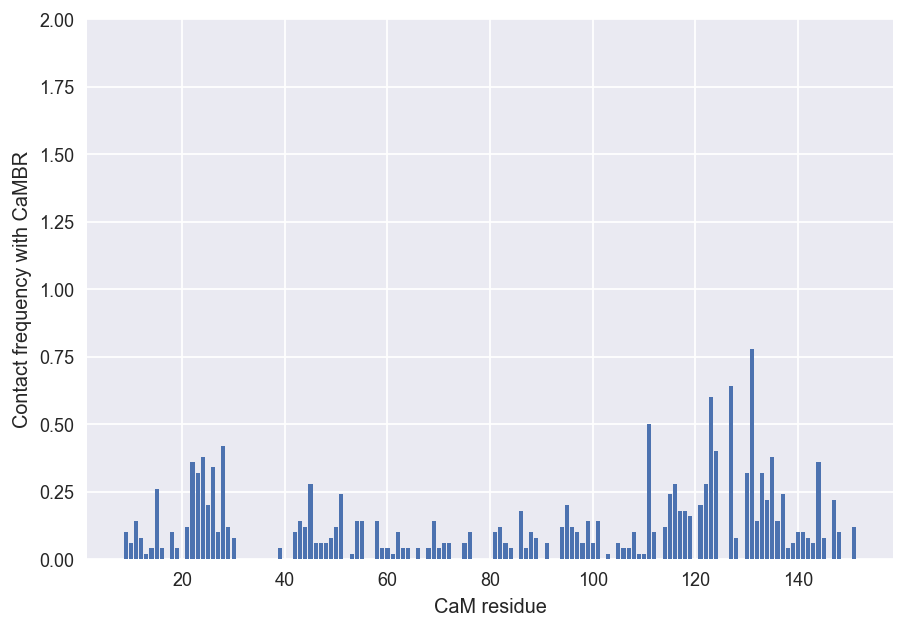

In [75]:
LCCC15M=getTmContact('linkerCoil','CaMBRcoil','0.15M')

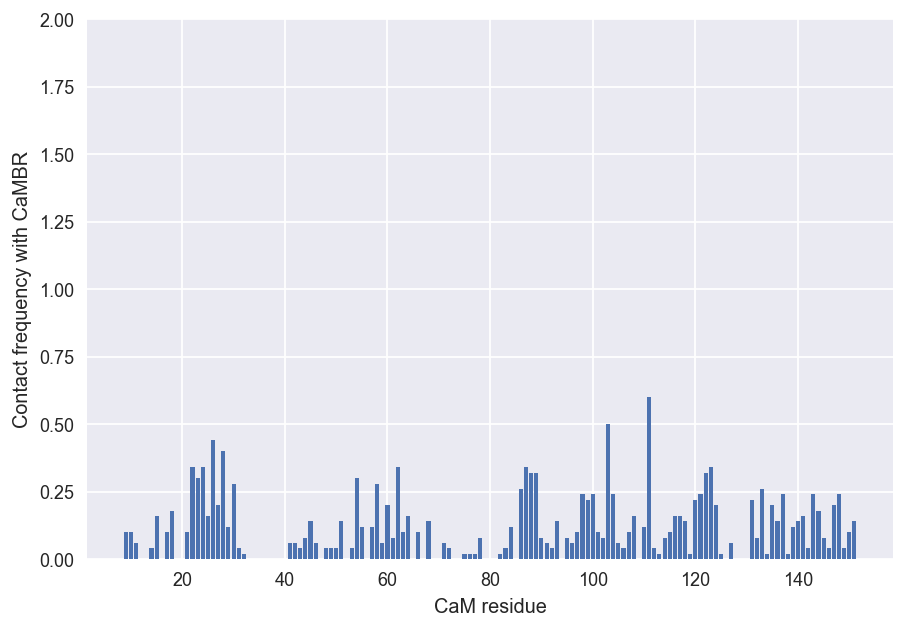

In [76]:
LCCH0M=getTmContact('linkerCoil','CaMBRhelix','0M')

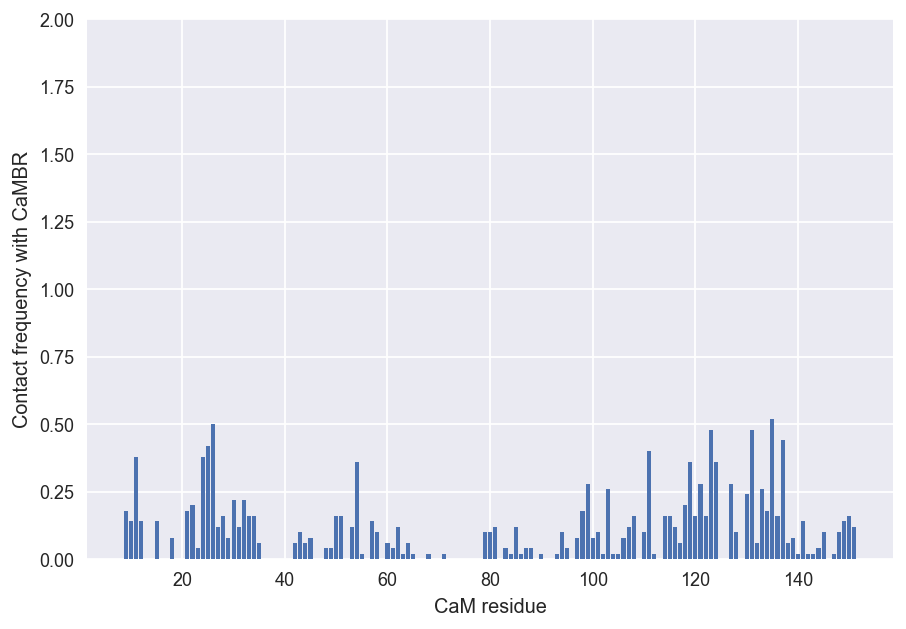

In [77]:
LCCH15M=getTmContact('linkerCoil','CaMBRhelix','0.15M')

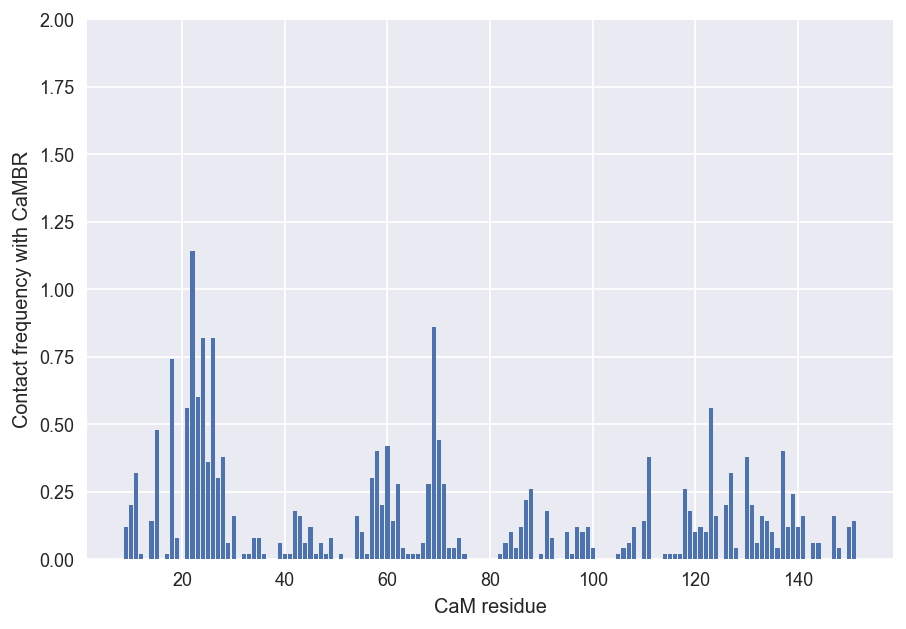

In [78]:
LHCH0M=getTmContact('linkerHelix','CaMBRhelix','0M')

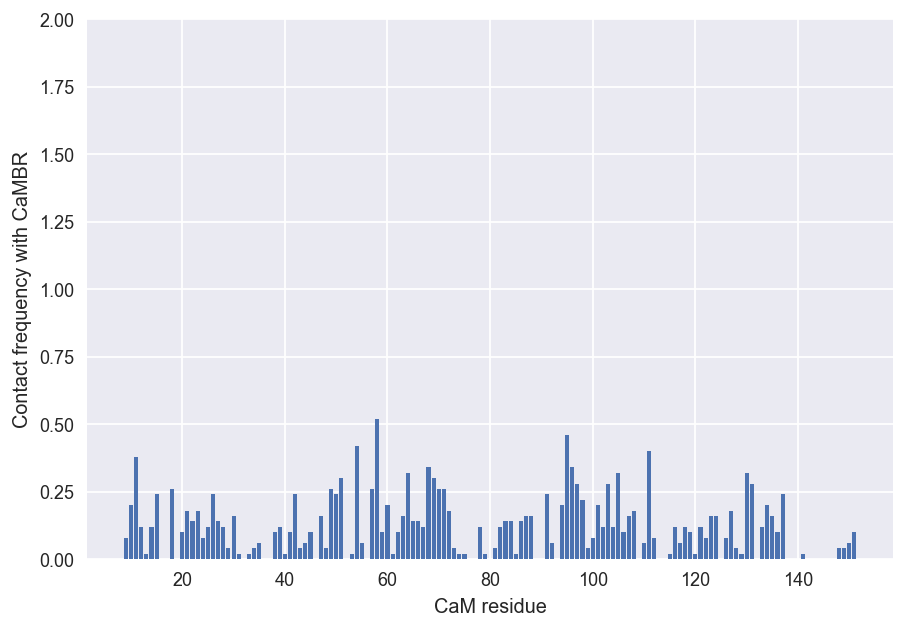

In [79]:
LHCH15M=getTmContact('linkerHelix','CaMBRhelix','0.15M')

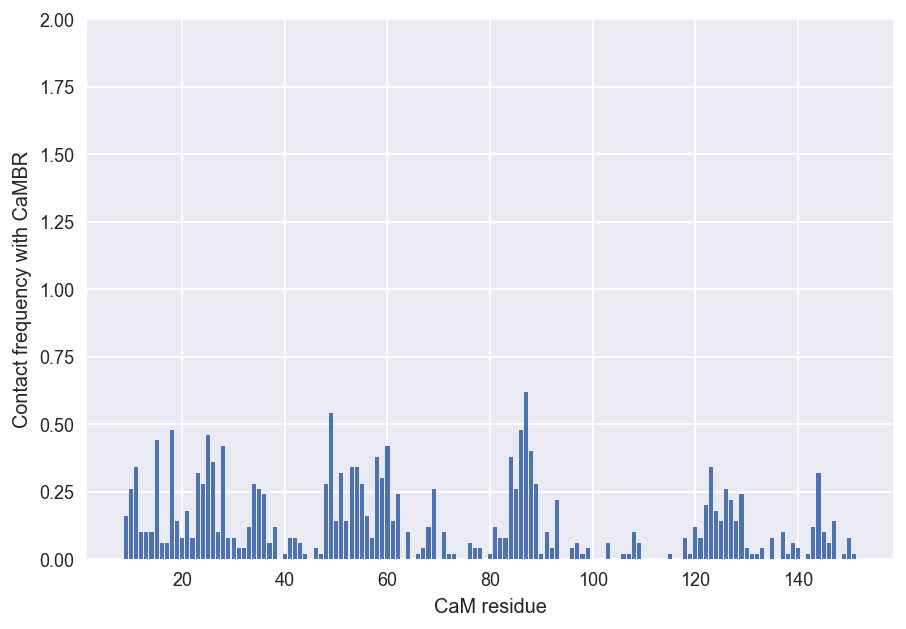

In [80]:
LCDCC0M=getTmContact('linkerCoilimpairedDomain','CaMBRcoil','0M')

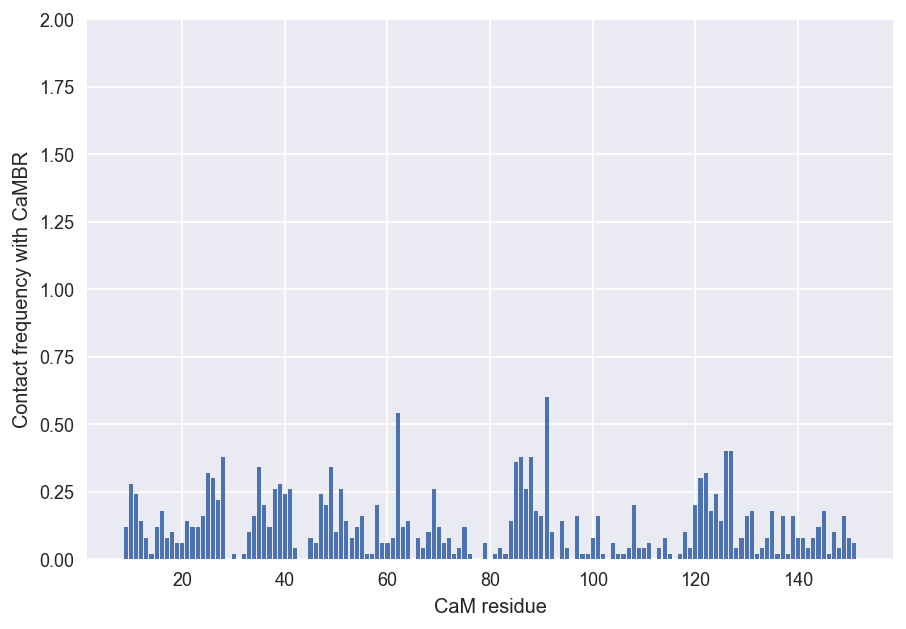

In [81]:
LCDCC15M=getTmContact('linkerCoilimpairedDomain','CaMBRcoil','0.15M')

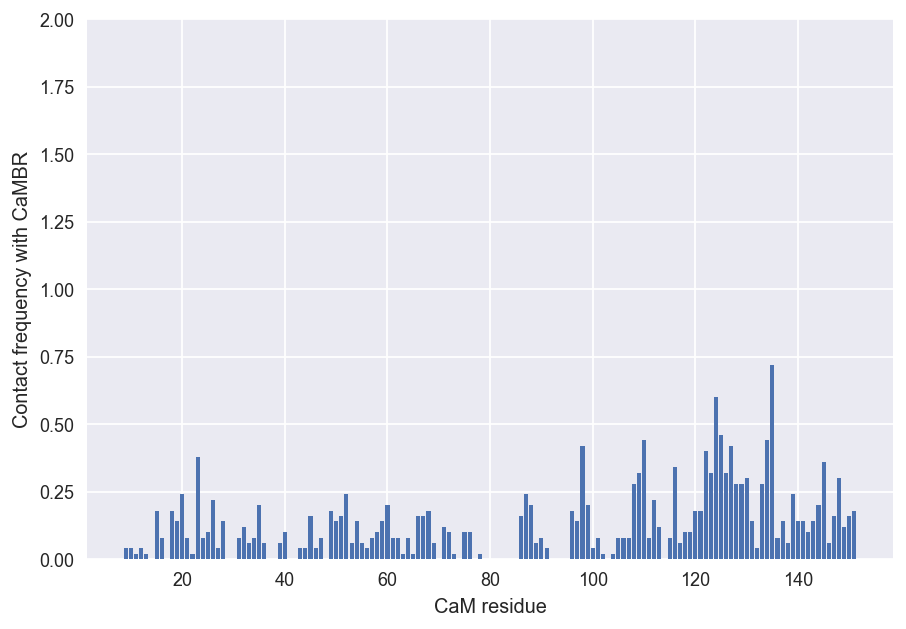

In [82]:
LCDCH0M=getTmContact('linkerCoilimpairedDomain','CaMBRhelix','0M')

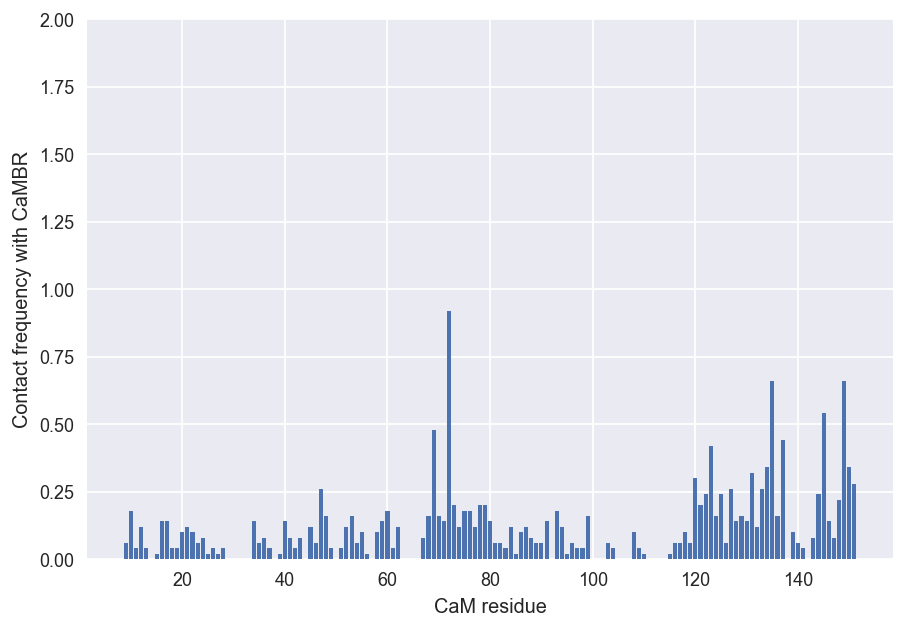

In [83]:
LCDCH15M=getTmContact('linkerCoilimpairedDomain','CaMBRhelix','0.15M')

In [84]:
helix015 = getTmContact("CaMBRhelix","0.15M")

FileNotFoundError: [Errno 2] No such file or directory: '/home/binsun/plotfigures/CaMBRkinetics/martinicg/CaMBRhelix/0.15M/0M/1/Ncontact'

In [219]:
print (np.max(helix015[1]))

2.24
